# Logistic Regression: make_blobs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

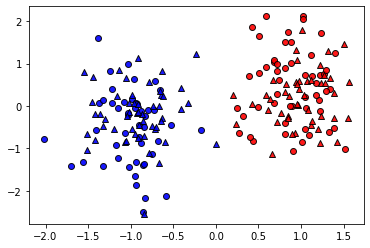

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=27)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def plot2Ddata(X_train,X_test,y_train,y_test):
    plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],
                color='b',marker='o',alpha=0.9,edgecolors='k')
    plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],
                color='r',marker='o',alpha=0.9,edgecolors='k')
    plt.scatter(X_test[y_test == 0,0],X_test[y_test == 0,1],
                color='b',marker='^',alpha=0.9,edgecolors='k')
    plt.scatter(X_test[y_test == 1,0],X_test[y_test == 1,1],
                color='r',marker='^',alpha=0.9,edgecolors='k')
    
plot2Ddata(X_train,X_test,y_train,y_test)

In [3]:
class LogisticRegression:
    def __init__(self, learn_rate, num_iterations):
        self.learn_rate = learn_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        if z < 0:
            return np.exp(z)/(1 + np.exp(z))
        else:
            return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Batch Gradient Descent
        for i in range(self.num_iterations):
            dw, db = 0, 0
            for j in range(len(y)):
                z = np.dot(X[j,:], self.weights) + self.bias
                y_pred = self.sigmoid(z)

                # Accumulate gradients
                output_error = y_pred - y[j]
                dw += np.dot(X[j,:], output_error)
                db += output_error

            # Gradient descent updates
            self.weights -= self.learn_rate * dw
            self.bias -= self.learn_rate * db
            
            if (i+1) % 10 == 0 or i == 0:
                print(f'Iteration: {i+1}')
                self.plot_decision(X,y)

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        y_pred_proba = self.sigmoid(z)
        y_pred = np.round(y_pred_proba)
        return y_pred, y_pred_proba
    
    def plot_decision(self, X, y):
        nx, ny = 100, 100
        xv, yv = np.meshgrid(np.linspace(-3,3,nx), 
                             np.linspace(-3,3,ny))
        zv = np.zeros(xv.shape)
        for i in range(nx):
            for j in range(ny):
                _,zv[i,j] = self.predict(np.array([xv[i,j], yv[i,j]]))

        plt.figure(figsize=(6,4))
        plt.contourf(xv, yv, zv, cmap=cm.bwr)
        plt.scatter(X[y == 0,0],X[y == 0,1], color='b', marker='o',
                    alpha=0.9, edgecolors='k', label='(-) Training samples')
        plt.scatter(X[y == 1,0],X[y == 1,1], color='r', marker='o',
                    alpha=0.9, edgecolors='k', label='(+) Training samples')
        plt.legend()
        plt.show()

Iteration: 1


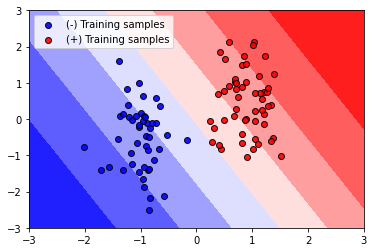

Iteration: 10


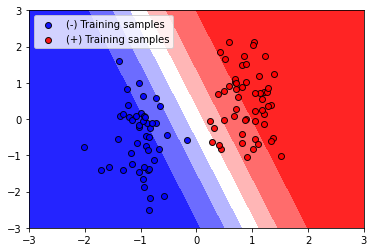

Iteration: 20


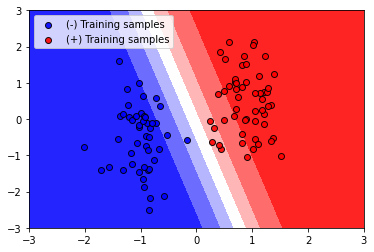

Iteration: 30


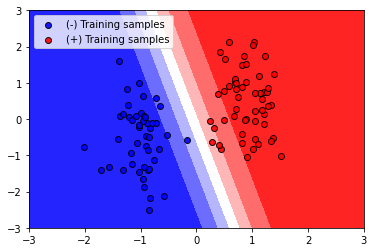

Iteration: 40


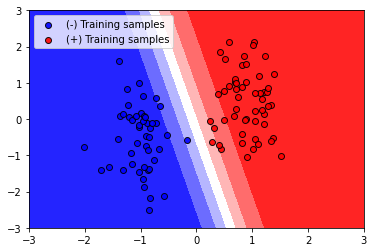

Iteration: 50


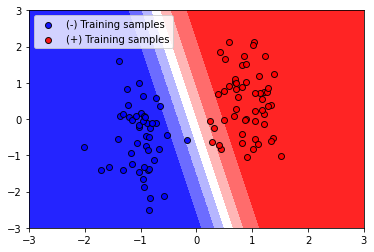

Iteration: 60


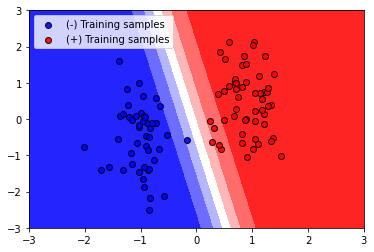

Iteration: 70


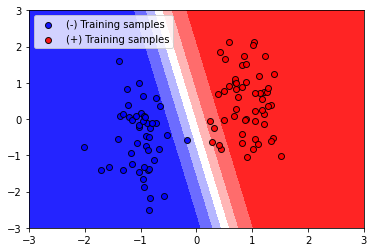

Iteration: 80


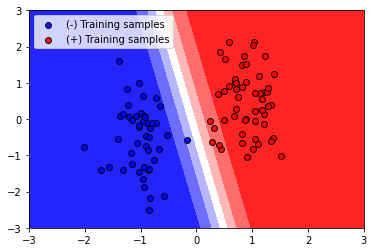

Iteration: 90


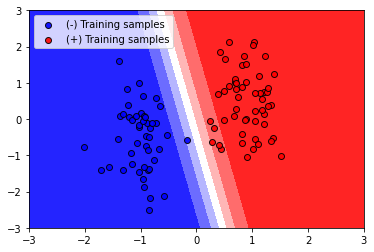

Iteration: 100


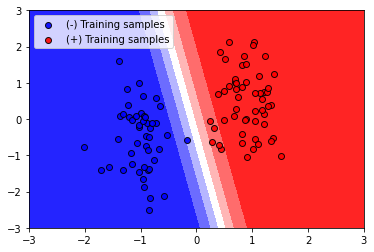

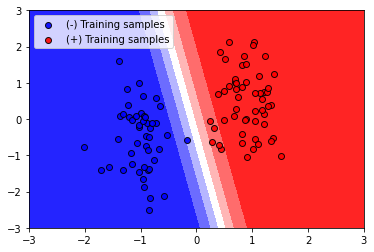

Weights and bias:
[4.65861617 0.84812624]
0.4741725085981733


In [4]:
learn_rate = 0.01
num_iterations = 100

# Create an instance of LogisticRegression
mdl = LogisticRegression(learn_rate, num_iterations)

# Train the binary classifier
mdl.fit(X_train, y_train)
mdl.plot_decision(X_train, y_train)
print('Weights and bias:')
print(mdl.weights)
print(mdl.bias)

In [5]:
y_train_pred = np.zeros(y_train.shape)
for i in range(len(y_train)):
    y_train_pred[i],_ = mdl.predict(X_train[i,:])

print("Performance on Training Set")
print(f'  Total no. of training samples: {len(y_train)}')
TP = np.sum(y_train_pred * y_train)
TN = np.sum((1 - y_train_pred) * (1 - y_train))
FP = np.sum((1 - y_train_pred) * y_train)
FN = np.sum(y_train_pred * (1 - y_train))
print(f'  True Positive: {TP}')
print(f'  True Negative: {TN}')
print(f'  False Positive: {FP}')
print(f'  False Negative: {FN}')
print(f'  Accuracy: {(TP + TN)/len(y_train)}')

y_test_pred = np.zeros(y_test.shape)
for i in range(len(y_test)):
    y_test_pred[i],_ = mdl.predict(X_test[i,:])

print("Performance on Test Set")
print(f'  Total no. of test samples: {len(y_test)}')
TP = np.sum(y_test_pred * y_test)
TN = np.sum((1 - y_test_pred) * (1 - y_test))
FP = np.sum((1 - y_test_pred) * y_test)
FN = np.sum(y_test_pred * (1 - y_test))
print(f'  True Positive: {TP}')
print(f'  True Negative: {TN}')
print(f'  False Positive: {FP}')
print(f'  False Negative: {FN}')
print(f'  Accuracy: {(TP + TN)/len(y_test)}')

Performance on Training Set
  Total no. of training samples: 100
  True Positive: 53.0
  True Negative: 47.0
  False Positive: 0.0
  False Negative: 0.0
  Accuracy: 1.0
Performance on Test Set
  Total no. of test samples: 100
  True Positive: 47.0
  True Negative: 52.0
  False Positive: 0.0
  False Negative: 1.0
  Accuracy: 0.99


## Results using built-in Logistic Regression from sklearn

Train Logistic Regression then evaluate using Confusion matrix

Coefficients:  [0.37589696] [[3.35632936 0.63482189]]


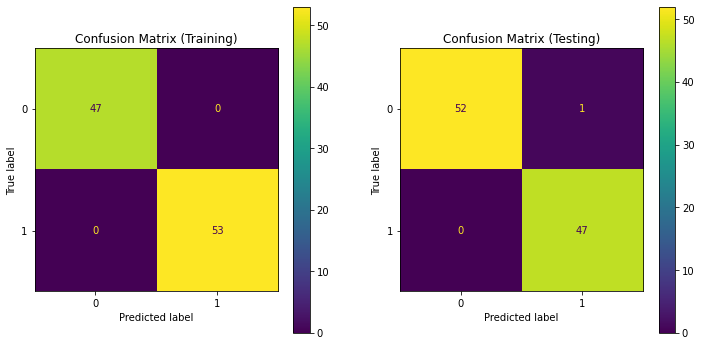

 Training Accuracy: 1.0
 Testing Accuracy: 0.99


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train the classifier
mdl = LogisticRegression().fit(X_train, y_train)

print(f"Coefficients: ", mdl.intercept_, mdl.coef_)
y_train_pred = mdl.predict(X_train)
y_test_pred = mdl.predict(X_test)
conf_train = confusion_matrix(y_train, y_train_pred)
conf_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12,6))
ax = plt.subplot(121)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_train)
cm_display.plot(ax=ax)
plt.title('Confusion Matrix (Training)')
ax = plt.subplot(122)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_test)
cm_display.plot(ax=ax)
plt.title('Confusion Matrix (Testing)')
plt.show()
print(f' Training Accuracy: {mdl.score(X_train, y_train)}')
print(f' Testing Accuracy: {mdl.score(X_test,y_test)}')

Visualize the decision boundary

<Figure size 648x504 with 0 Axes>

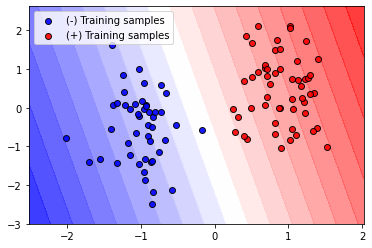

In [7]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(9,7))
disp = DecisionBoundaryDisplay.from_estimator(mdl, X_train, cmap=cm.bwr, levels=20,
                                       alpha=0.8, eps=0.5)
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1], color='b', marker='o',
            alpha=0.9, edgecolors='k', label='(-) Training samples')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1], color='r', marker='o',
            alpha=0.9, edgecolors='k', label='(+) Training samples')
plt.legend()
plt.show()